In [2]:
import pandas as pd
import numpy as np
from datetime import timedelta

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
## Предварительная обработка данных
## Проверяю каждый файл на выбросы и тип
## Сначала просто их загрузил чтобы посмотреть, здесь этот этап пропускаю чтобы не было громоздко, сразу прописываю parse_dates

In [3]:
customers = pd.read_csv('C:/Users/Admin/Downloads/olist_customers_dataset.csv')

In [5]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [12]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [15]:
orders = pd.read_csv('C:/Users/Admin/Downloads/olist_orders_dataset.csv', parse_dates = ['order_purchase_timestamp', 'order_approved_at', 
                                   'order_delivered_carrier_date', 'order_delivered_customer_date',
                                  'order_estimated_delivery_date'])

In [16]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [17]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [19]:
order_items = pd.read_csv('C:/Users/Admin/Downloads/olist_order_items_dataset.csv', parse_dates = ['shipping_limit_date'])

In [21]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [22]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [43]:
## 1. Сколько у нас пользователей, которые совершили покупку только один раз?

In [44]:
## Что буду считать покупкой. Я считаю, что покупка совершена, если проведена оплата. Все, что происходит дальше 
## - происходит после факта покупки. То есть все статусы заказа, кроме created,unavailable и  canceled меня устраивают.
## Еще бы в идеале чтобы order_approved_at было не равно 0, но там могла и система пролагать, да и я пока не спец
## допущу эту ошибку. В любом случае это 160 значений из 99 тысяч. Допущу погрешность))

In [42]:
orders.order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [33]:
orders.order_approved_at.isna().sum()

160

In [ ]:
## В связи с тем, что уникальные айди клиентов хранятся в таблице customers, объединю customers и orders  а потом уже 
## отфильтруюсь.

In [140]:
customers_and_orders = customers.merge(orders, how='inner', on='customer_id')

In [47]:
## Проверю, не потерял ли часть данных))

In [141]:
customers_and_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    99441 non-null  object        
 1   customer_unique_id             99441 non-null  object        
 2   customer_zip_code_prefix       99441 non-null  int64         
 3   customer_city                  99441 non-null  object        
 4   customer_state                 99441 non-null  object        
 5   order_id                       99441 non-null  object        
 6   order_status                   99441 non-null  object        
 7   order_purchase_timestamp       99441 non-null  datetime64[ns]
 8   order_approved_at              99281 non-null  datetime64[ns]
 9   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 10  order_delivered_customer_date  96476 non-null  datetime64[ns]
 11  order_estimated

In [ ]:
## Видимо все в порядке, тк строчек осталось 99441 как и было в обеих таблицах.

In [142]:
blacklist = ['created', 'unavailable', 'canceled']

In [62]:
## Сначала фильтрую по условиям покупки, которые выше описал. Группирую по уникальным id.
## Агрегирую по количеству заказов, фильтрую, оставляя тех кто сделал 1 покупку и считаю сумму уникальных, тк на дупликаты
## я до этого нигде не проверял, пусть хотя бы здесь это учту))

In [143]:
success_purchases = customers_and_orders.query(' order_status not in @blacklist')
customers_count = success_purchases \
.groupby('customer_unique_id', as_index = False) \
.agg({'order_id': 'count'}) \
.query('order_id == 1') \
.agg({'customer_unique_id': 'nunique'})

In [145]:
success_purchases.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98202 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    98202 non-null  object        
 1   customer_unique_id             98202 non-null  object        
 2   customer_zip_code_prefix       98202 non-null  int64         
 3   customer_city                  98202 non-null  object        
 4   customer_state                 98202 non-null  object        
 5   order_id                       98202 non-null  object        
 6   order_status                   98202 non-null  object        
 7   order_purchase_timestamp       98202 non-null  datetime64[ns]
 8   order_approved_at              98188 non-null  datetime64[ns]
 9   order_delivered_carrier_date   97583 non-null  datetime64[ns]
 10  order_delivered_customer_date  96470 non-null  datetime64[ns]
 11  order_estimated

In [97]:
customers_count

customer_unique_id    92099
dtype: int64

In [98]:
customers.customer_unique_id.nunique()

96096

In [99]:
percent_of_1_buy = customers_count/customers.customer_unique_id.nunique()*100

In [100]:
percent_of_1_buy

customer_unique_id    95.840618
dtype: float64

In [ ]:
## Интересно, по 1 покупке совершили 96 % покупателей. 

In [76]:
## 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

In [77]:
orders.order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [105]:
## Буду считать недоставленными заказами заказы со статусом unavailable и canceled, тк остальные статусы - это этап поставки
## заказа, а не причина, по которой он не доставлен

In [80]:
customers_and_orders['month'] = customers_and_orders.order_purchase_timestamp.dt.strftime('%Y%m')

In [90]:
## Отфильтрую недоставленные заказы, сгруппирую по причинам, и разделю все заказы на количество месяцев с учетом годов.

In [109]:
undelivered = customers_and_orders.query('order_status == "unavailable" or order_status == "canceled"')\
                .groupby('order_status')\
                .agg({'customer_id':'nunique'})\
                /customers_and_orders.month.nunique()\
                
undelivered.rename(columns = {'customer_id':'avg_undelivered'})  

,avg_undelivered
order_status,
canceled,25.00
unavailable,24.36


In [92]:
## Не уверен, что именно это требуется, но на мой взгляд на вопрос задачи я ответил.

In [93]:
## 3. По каждому товару определить, в какой день недели товар чаще всего покупается.

In [104]:
## Для начала объединю успешные заказы и товары, чтобы взять информацию по времени покупки.

In [146]:
items_and_orders = success_purchases.merge(order_items, how='inner', on='order_id')

In [147]:
items_and_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


In [148]:
items_and_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112101 entries, 0 to 112100
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    112101 non-null  object        
 1   customer_unique_id             112101 non-null  object        
 2   customer_zip_code_prefix       112101 non-null  int64         
 3   customer_city                  112101 non-null  object        
 4   customer_state                 112101 non-null  object        
 5   order_id                       112101 non-null  object        
 6   order_status                   112101 non-null  object        
 7   order_purchase_timestamp       112101 non-null  datetime64[ns]
 8   order_approved_at              112086 non-null  datetime64[ns]
 9   order_delivered_carrier_date   111380 non-null  datetime64[ns]
 10  order_delivered_customer_date  110189 non-null  datetime64[ns]
 11  

In [123]:
## 'Товар покупается' на мой взлгяд тождественно равно - оплата подтверждена.

In [149]:
task3 = items_and_orders[['order_id', 'order_approved_at', 'product_id']]

In [150]:
task3

,order_id,order_approved_at,product_id
0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:22:12,a9516a079e37a9c9c36b9b78b10169e8
1,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:58:32,4aa6014eceb682077f9dc4bffebc05b0
2,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-20 16:19:10,bd07b66896d6f1494f5b86251848ced7
3,951670f92359f4fe4a63112aa7306eba,2018-03-13 17:29:19,a5647c44af977b148e0a3a4751a09e2e
4,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 10:10:09,9391a573abe00141c56e38d84d7d5b3b
...,...,...,...
112096,6760e20addcf0121e9d58f2f1ff14298,2018-04-07 16:08:45,ccb4503d9d43d245d3b295d0544f988b
112097,9ec0c8947d973db4f4e8dcf1fbfa8f1b,2018-04-04 08:35:12,9ede6b0570a75a4b9de4f383329f99ee
112098,fed4434add09a6f332ea398efd656a5c,2018-04-08 20:30:03,7a5d2e1e131a860ae7d18f6fffa9d689
112099,e31ec91cea1ecf97797787471f98a8c2,2017-11-03 21:31:20,f819f0c84a64f02d3a5606ca95edd272


In [151]:
task3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112101 entries, 0 to 112100
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   order_id           112101 non-null  object        
 1   order_approved_at  112086 non-null  datetime64[ns]
 2   product_id         112101 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 3.4+ MB


In [ ]:
## Количество заказов по дням

In [152]:
task3['weekday'] = task3.order_approved_at.dt.day_name()

C:\Users\Admin\AppData\Local\Temp/ipykernel_8220/1344067217.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  task3['weekday'] = task3.order_approved_at.dt.day_name()


In [153]:
task3

,order_id,order_approved_at,product_id,weekday
0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:22:12,a9516a079e37a9c9c36b9b78b10169e8,Tuesday
1,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:58:32,4aa6014eceb682077f9dc4bffebc05b0,Friday
2,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-20 16:19:10,bd07b66896d6f1494f5b86251848ced7,Sunday
3,951670f92359f4fe4a63112aa7306eba,2018-03-13 17:29:19,a5647c44af977b148e0a3a4751a09e2e,Tuesday
4,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 10:10:09,9391a573abe00141c56e38d84d7d5b3b,Sunday
...,...,...,...,...
112096,6760e20addcf0121e9d58f2f1ff14298,2018-04-07 16:08:45,ccb4503d9d43d245d3b295d0544f988b,Saturday
112097,9ec0c8947d973db4f4e8dcf1fbfa8f1b,2018-04-04 08:35:12,9ede6b0570a75a4b9de4f383329f99ee,Wednesday
112098,fed4434add09a6f332ea398efd656a5c,2018-04-08 20:30:03,7a5d2e1e131a860ae7d18f6fffa9d689,Sunday
112099,e31ec91cea1ecf97797787471f98a8c2,2017-11-03 21:31:20,f819f0c84a64f02d3a5606ca95edd272,Friday


In [154]:
weekday_items = task3.groupby(['product_id', 'weekday'], as_index=False) \
                                .order_id \
                                .count() \
                                .rename(columns={'order_id' : 'orders_count'})
weekday_items

,product_id,weekday,orders_count
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday,1
1,00088930e925c41fd95ebfe695fd2655,Tuesday,1
2,0009406fd7479715e4bef61dd91f2462,Friday,1
3,000b8f95fcb9e0096488278317764d19,Friday,1
4,000b8f95fcb9e0096488278317764d19,Wednesday,1
...,...,...,...
60788,fff9553ac224cec9d15d49f5a263411f,Saturday,1
60789,fffdb2d0ec8d6a61f0a0a0db3f25b441,Friday,1
60790,fffdb2d0ec8d6a61f0a0a0db3f25b441,Thursday,1
60791,fffdb2d0ec8d6a61f0a0a0db3f25b441,Tuesday,3


In [155]:
weekday_items.orders_count.value_counts()

1      42675
2       9554
3       3412
4       1701
5       1038
       ...  
70         1
66         1
82         1
96         1
119        1
Name: orders_count, Length: 73, dtype: int64

In [176]:
## Почти все товары покупаются максимум раз в день.
## Поэтому надо учесть варианты, когда у одного товара это максимальное количество товаров покупают несколько дней в неделю.

In [ ]:
## Для этого сначала считаю максимальное количество покупок для каждого товара.

In [162]:
 max_item_count = weekday_items.groupby('product_id', as_index=False) \
                                .agg({'orders_count':'max'}) \
                                .rename(columns={'orders_count' : 'max_orders'})
max_item_count

,product_id,max_orders
0,00066f42aeeb9f3007548bb9d3f33c38,1
1,00088930e925c41fd95ebfe695fd2655,1
2,0009406fd7479715e4bef61dd91f2462,1
3,000b8f95fcb9e0096488278317764d19,1
4,000d9be29b5207b54e86aa1b1ac54872,1
...,...,...
32721,fff6177642830a9a94a0f2cba5e476d1,1
32722,fff81cc3158d2725c0655ab9ba0f712c,1
32723,fff9553ac224cec9d15d49f5a263411f,1
32724,fffdb2d0ec8d6a61f0a0a0db3f25b441,3


In [177]:
## Теперь объединяю таблицы и оставлю строки, равные максимальным значениям.

In [163]:
all_items = weekday_items.merge(max_item_count, how='left', on='product_id')
all_items

,product_id,weekday,orders_count,max_orders
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday,1,1
1,00088930e925c41fd95ebfe695fd2655,Tuesday,1,1
2,0009406fd7479715e4bef61dd91f2462,Friday,1,1
3,000b8f95fcb9e0096488278317764d19,Friday,1,1
4,000b8f95fcb9e0096488278317764d19,Wednesday,1,1
...,...,...,...,...
60788,fff9553ac224cec9d15d49f5a263411f,Saturday,1,1
60789,fffdb2d0ec8d6a61f0a0a0db3f25b441,Friday,1,3
60790,fffdb2d0ec8d6a61f0a0a0db3f25b441,Thursday,1,3
60791,fffdb2d0ec8d6a61f0a0a0db3f25b441,Tuesday,3,3


In [164]:
all_items.query('orders_count == max_orders')

,product_id,weekday,orders_count,max_orders
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday,1,1
1,00088930e925c41fd95ebfe695fd2655,Tuesday,1,1
2,0009406fd7479715e4bef61dd91f2462,Friday,1,1
3,000b8f95fcb9e0096488278317764d19,Friday,1,1
4,000b8f95fcb9e0096488278317764d19,Wednesday,1,1
...,...,...,...,...
60786,fff6177642830a9a94a0f2cba5e476d1,Saturday,1,1
60787,fff81cc3158d2725c0655ab9ba0f712c,Monday,1,1
60788,fff9553ac224cec9d15d49f5a263411f,Saturday,1,1
60791,fffdb2d0ec8d6a61f0a0a0db3f25b441,Tuesday,3,3


In [178]:
##Итоговая таблица с товаром и днями максимального количества покупок

In [179]:
max_items_weekdays = all_items.query('orders_count == max_orders')[['product_id', 'weekday']]
max_items_weekdays

,product_id,weekday
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday
1,00088930e925c41fd95ebfe695fd2655,Tuesday
2,0009406fd7479715e4bef61dd91f2462,Friday
3,000b8f95fcb9e0096488278317764d19,Friday
4,000b8f95fcb9e0096488278317764d19,Wednesday
...,...,...
60786,fff6177642830a9a94a0f2cba5e476d1,Saturday
60787,fff81cc3158d2725c0655ab9ba0f712c,Monday
60788,fff9553ac224cec9d15d49f5a263411f,Saturday
60791,fffdb2d0ec8d6a61f0a0a0db3f25b441,Tuesday


In [182]:
## 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? 
##   Не стоит забывать, что внутри месяца может быть не целое количество недель. 
##   Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть. 

In [187]:
## Воспользуюсь таблицей покупок из 1 задания.

In [183]:
success_purchases

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05


In [184]:
success_purchases.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98202 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    98202 non-null  object        
 1   customer_unique_id             98202 non-null  object        
 2   customer_zip_code_prefix       98202 non-null  int64         
 3   customer_city                  98202 non-null  object        
 4   customer_state                 98202 non-null  object        
 5   order_id                       98202 non-null  object        
 6   order_status                   98202 non-null  object        
 7   order_purchase_timestamp       98202 non-null  datetime64[ns]
 8   order_approved_at              98188 non-null  datetime64[ns]
 9   order_delivered_carrier_date   97583 non-null  datetime64[ns]
 10  order_delivered_customer_date  96470 non-null  datetime64[ns]
 11  order_estimated

In [188]:
## Сначала посчитаю количество заказов по месяцам.

In [185]:
 success_purchases['order_year_month'] = success_purchases.order_approved_at.astype('datetime64[M]')

C:\Users\Admin\AppData\Local\Temp/ipykernel_8220/2309690735.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  success_purchases['order_year_month'] = success_purchases.order_approved_at.astype('datetime64[M]')


In [186]:
success_purchases

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_year_month
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2017-05-01
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,2018-01-01
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,2018-05-01
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,2018-03-01
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,2018-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25,2018-04-01
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20,2018-04-01
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02,2018-04-01
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05,2017-11-01


In [189]:
orders_by_month = success_purchases.query('order_year_month < "2018-09-01" and order_year_month != "2016-12-01" and order_year_month != "2016-11-01"') \
                                .groupby(['customer_unique_id', 'order_year_month'], as_index=False) \
                                .agg(order_count=('order_id', 'count'))

In [190]:
orders_by_month

,customer_unique_id,order_year_month,order_count
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-01,1
2,0000f46a3911fa3c0805444483337064,2017-03-01,1
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-01,1
4,0004aac84e0df4da2b147fca70cf8255,2017-11-01,1
...,...,...,...
96839,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-01,1
96840,fffea47cd6d3cc0a88bd621562a9d061,2017-12-01,1
96841,ffff371b4d645b6ecea244b27531430a,2017-02-01,1
96842,ffff5962728ec6157033ef9805bacc48,2018-05-01,1


In [ ]:
## Теперь рассчитаю количество недель в каждом месяце, с округлением до сотых, согласно условиям.

In [191]:
orders_by_month['weeks_count'] = round(orders_by_month.order_year_month.dt.daysinmonth / 7, 2)

In [192]:
orders_by_month

,customer_unique_id,order_year_month,order_count,weeks_count
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,1,4.43
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-01,1,4.43
2,0000f46a3911fa3c0805444483337064,2017-03-01,1,4.43
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-01,1,4.43
4,0004aac84e0df4da2b147fca70cf8255,2017-11-01,1,4.29
...,...,...,...,...
96839,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-01,1,4.29
96840,fffea47cd6d3cc0a88bd621562a9d061,2017-12-01,1,4.43
96841,ffff371b4d645b6ecea244b27531430a,2017-02-01,1,4.00
96842,ffff5962728ec6157033ef9805bacc48,2018-05-01,1,4.43


In [ ]:
##  Затем вычислю количество покупок каждого пользователя за каждую неделю:

In [193]:
orders_by_month['orders_by_week'] = round(orders_by_month.order_count / orders_by_month.weeks_count, 2)

In [194]:
orders_by_month

,customer_unique_id,order_year_month,order_count,weeks_count,orders_by_week
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,1,4.43,0.23
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-01,1,4.43,0.23
2,0000f46a3911fa3c0805444483337064,2017-03-01,1,4.43,0.23
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-01,1,4.43,0.23
4,0004aac84e0df4da2b147fca70cf8255,2017-11-01,1,4.29,0.23
...,...,...,...,...,...
96839,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-01,1,4.29,0.23
96840,fffea47cd6d3cc0a88bd621562a9d061,2017-12-01,1,4.43,0.23
96841,ffff371b4d645b6ecea244b27531430a,2017-02-01,1,4.00,0.25
96842,ffff5962728ec6157033ef9805bacc48,2018-05-01,1,4.43,0.23


In [ ]:
## И теперь вычислю среднее количество покупок в неделю по месяцам:

In [195]:
mean_orders_by_week = orders_by_month.groupby(['customer_unique_id', 'order_year_month'], as_index=False) \
                                    .agg({'orders_by_week' : 'mean'}) \
                                    .rename(columns={'orders_by_week': 'mean_orders_by_week', 'order_year_month' : 'month'}) \
                                    .sort_values(['customer_unique_id', 'month'])

In [196]:
mean_orders_by_week

,customer_unique_id,month,mean_orders_by_week
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,0.23
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-01,0.23
2,0000f46a3911fa3c0805444483337064,2017-03-01,0.23
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-01,0.23
4,0004aac84e0df4da2b147fca70cf8255,2017-11-01,0.23
...,...,...,...
96839,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-01,0.23
96840,fffea47cd6d3cc0a88bd621562a9d061,2017-12-01,0.23
96841,ffff371b4d645b6ecea244b27531430a,2017-02-01,0.25
96842,ffff5962728ec6157033ef9805bacc48,2018-05-01,0.23


In [197]:
## 5. Используя pandas, проведи когортный анализ пользователей. 
##    В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц. 

In [ ]:
## В данном случае когортой будут являться покупатели, объединенные по дате подтверждения оплаты покупки (за искомый период).

In [ ]:
## Отфильтрую данные по времени, оставляю только 2017 год.

In [198]:
success_purchases

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_year_month
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2017-05-01
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,2018-01-01
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,2018-05-01
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,2018-03-01
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,2018-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25,2018-04-01
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20,2018-04-01
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02,2018-04-01
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05,2017-11-01


In [199]:
 success_purchases_2017 = success_purchases.query('order_approved_at < "2018-01-01" and order_approved_at > "2016-12-01"')

In [201]:
## Глянул таблицу, много столбцов по ходу решения добавил, оставлю только нужные

In [204]:
success_purchases_2017 = success_purchases_2017[['order_id', 'customer_id', 'order_status', 'order_year_month', 'customer_unique_id']]

In [205]:
success_purchases_2017

,order_id,customer_id,order_status,order_year_month,customer_unique_id
0,00e7ee1b050b8499577073aeb2a297a1,06b8999e2fba1a1fbc88172c00ba8bc7,delivered,2017-05-01,861eff4711a542e4b93843c6dd7febb0
5,5741ea1f91b5fbab2bd2dc653a5b5099,879864dab9bc3047522c92c82e1212b8,delivered,2017-09-01,4c93744516667ad3b8f1fb645a3116a4
7,1093c8304c7a003280dd34598194913d,5e274e7a0c3809e14aba7ad5aae0d407,delivered,2017-11-01,57b2a98a409812fe9618067b6b8ebe4f
10,8428e578bb1cf839ae26a6b7615502b9,9fb35e4ed6f0a14a4977cd9aea4042bb,delivered,2017-11-01,2a7745e1ed516b289ed9b29c7d0539a5
12,83d8f70418eefd96f37b483dff430305,b2d1536598b73a9abd18e0d75d92f0a3,delivered,2017-09-01,918dc87cd72cd9f6ed4bd442ed785235
...,...,...,...,...,...
99430,326c29ec5b89834b17aea7d85302fd70,27b9b32173455ef32167540451749d0b,delivered,2017-05-01,277490f0d435b602fe4475d4b89e9181
99433,ec3a75fb0ac595e461765d2d854b1d08,14308d2303a3e2bdf4939b86c46d2679,delivered,2017-03-01,e7f8760e2bbd2f1986bebd99596c088e
99435,c9aea907527f5d4f5fb44955c18a79fb,7fe2e80252a9ea476f950ae8f85b0f8f,delivered,2017-12-01,4b5820135d360a45552b5163835b1d89
99439,e31ec91cea1ecf97797787471f98a8c2,56b18e2166679b8a959d72dd06da27f9,delivered,2017-11-01,73c2643a0a458b49f58cea58833b192e


In [ ]:
## Самые ранние даты покупок для каждого пользователя

In [206]:
customer = success_purchases_2017.groupby('customer_unique_id', as_index=False).order_year_month.agg('min')
customer

,customer_unique_id,order_year_month
0,0000f46a3911fa3c0805444483337064,2017-03-01
1,0000f6ccb0745a6a4b88665a16c9f078,2017-10-01
2,0004aac84e0df4da2b147fca70cf8255,2017-11-01
3,0005e1862207bf6ccc02e4228effd9a0,2017-03-01
4,0006fdc98a402fceb4eb0ee528f6a8d4,2017-07-01
...,...,...
42955,fffbf87b7a1a6fa8b03f081c5f51a201,2017-12-01
42956,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-01
42957,fffea47cd6d3cc0a88bd621562a9d061,2017-12-01
42958,ffff371b4d645b6ecea244b27531430a,2017-02-01


In [ ]:
## Месяцы, в которые совершались покупки

In [207]:
min_date = success_purchases_2017.order_year_month.min()
max_date = success_purchases_2017.order_year_month.max()
month = pd.DataFrame(pd.date_range(min_date, max_date, freq='MS'))
month.columns = ['month']
month

,month
0,2016-12-01
1,2017-01-01
2,2017-02-01
3,2017-03-01
4,2017-04-01
5,2017-05-01
6,2017-06-01
7,2017-07-01
8,2017-08-01
9,2017-09-01


In [209]:
customer['key'] = 1
month['key'] = 1

In [ ]:
## Генерирую временный датафрейм с данными по дате первой покупки каждого пользователи и датам остальных покупок. 
## Возьму только те строки, где дата покупки не ранее даты первой покупки:

In [210]:
temp_df = customer.merge(month, on='key')[['customer_unique_id', 'order_year_month', 'month']]
temp_df

,customer_unique_id,order_year_month,month
0,0000f46a3911fa3c0805444483337064,2017-03-01,2016-12-01
1,0000f46a3911fa3c0805444483337064,2017-03-01,2017-01-01
2,0000f46a3911fa3c0805444483337064,2017-03-01,2017-02-01
3,0000f46a3911fa3c0805444483337064,2017-03-01,2017-03-01
4,0000f46a3911fa3c0805444483337064,2017-03-01,2017-04-01
...,...,...,...
558475,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-01,2017-08-01
558476,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-01,2017-09-01
558477,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-01,2017-10-01
558478,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-01,2017-11-01


In [211]:
temp_df = temp_df[temp_df['month'] >= temp_df['order_year_month']]
temp_df

,customer_unique_id,order_year_month,month
3,0000f46a3911fa3c0805444483337064,2017-03-01,2017-03-01
4,0000f46a3911fa3c0805444483337064,2017-03-01,2017-04-01
5,0000f46a3911fa3c0805444483337064,2017-03-01,2017-05-01
6,0000f46a3911fa3c0805444483337064,2017-03-01,2017-06-01
7,0000f46a3911fa3c0805444483337064,2017-03-01,2017-07-01
...,...,...,...
558475,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-01,2017-08-01
558476,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-01,2017-09-01
558477,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-01,2017-10-01
558478,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-01,2017-11-01


In [ ]:
## Количество заказов каждого покупателя за каждый месяц:

In [213]:
orders_month = success_purchases_2017.groupby(['customer_unique_id', 'order_year_month'], as_index=False) \
                .order_id.agg('count') \
                .rename(columns={'order_year_month':'month', 'order_id' : 'order_count'})
orders_month

,customer_unique_id,month,order_count
0,0000f46a3911fa3c0805444483337064,2017-03-01,1
1,0000f6ccb0745a6a4b88665a16c9f078,2017-10-01,1
2,0004aac84e0df4da2b147fca70cf8255,2017-11-01,1
3,0005e1862207bf6ccc02e4228effd9a0,2017-03-01,1
4,0006fdc98a402fceb4eb0ee528f6a8d4,2017-07-01,1
...,...,...,...
43565,fffbf87b7a1a6fa8b03f081c5f51a201,2017-12-01,1
43566,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-01,1
43567,fffea47cd6d3cc0a88bd621562a9d061,2017-12-01,1
43568,ffff371b4d645b6ecea244b27531430a,2017-02-01,1


In [ ]:
## Теперь есть все данные для проведения когортного анализа

In [214]:
report = temp_df.merge(orders_month, on=['customer_unique_id', 'month'], how='left')
report

,customer_unique_id,order_year_month,month,order_count
0,0000f46a3911fa3c0805444483337064,2017-03-01,2017-03-01,1.0
1,0000f46a3911fa3c0805444483337064,2017-03-01,2017-04-01,NaN
2,0000f46a3911fa3c0805444483337064,2017-03-01,2017-05-01,NaN
3,0000f46a3911fa3c0805444483337064,2017-03-01,2017-06-01,NaN
4,0000f46a3911fa3c0805444483337064,2017-03-01,2017-07-01,NaN
...,...,...,...,...
216249,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-01,2017-08-01,NaN
216250,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-01,2017-09-01,NaN
216251,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-01,2017-10-01,NaN
216252,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-01,2017-11-01,NaN


In [215]:
report['active'] = (report['order_count'] > 0)*1 

In [ ]:
##  Количество покупателей в каждой когорте: (знаменатель)

In [216]:
report.pivot_table(index='order_year_month', 
                  columns='month',
                  values='active',
                  aggfunc='count')

month,2016-12-01,2017-01-01,2017-02-01,2017-03-01,2017-04-01,2017-05-01,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01
order_year_month,,,,,,,,,,,,,
2016-12-01,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2017-01-01,NaN,716.0,716.0,716.0,716.0,716.0,716.0,716.0,716.0,716.0,716.0,716.0,716.0
2017-02-01,NaN,NaN,1674.0,1674.0,1674.0,1674.0,1674.0,1674.0,1674.0,1674.0,1674.0,1674.0,1674.0
2017-03-01,NaN,NaN,NaN,2580.0,2580.0,2580.0,2580.0,2580.0,2580.0,2580.0,2580.0,2580.0,2580.0
2017-04-01,NaN,NaN,NaN,NaN,2302.0,2302.0,2302.0,2302.0,2302.0,2302.0,2302.0,2302.0,2302.0
2017-05-01,NaN,NaN,NaN,NaN,NaN,3543.0,3543.0,3543.0,3543.0,3543.0,3543.0,3543.0,3543.0
2017-06-01,NaN,NaN,NaN,NaN,NaN,NaN,3110.0,3110.0,3110.0,3110.0,3110.0,3110.0,3110.0
2017-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3777.0,3777.0,3777.0,3777.0,3777.0,3777.0
2017-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4154.0,4154.0,4154.0,4154.0,4154.0


In [ ]:
##  Количество активных покупателей в каждый месяц: (числитель)

In [217]:
report.pivot_table(index='order_year_month', 
                  columns='month',
                  values='active',
                  aggfunc='sum')

month,2016-12-01,2017-01-01,2017-02-01,2017-03-01,2017-04-01,2017-05-01,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01
order_year_month,,,,,,,,,,,,,
2016-12-01,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-01,NaN,716.0,4.0,2.0,1.0,3.0,1.0,3.0,1.0,1.0,0.0,2.0,2.0
2017-02-01,NaN,NaN,1674.0,4.0,4.0,3.0,7.0,2.0,4.0,3.0,1.0,3.0,2.0
2017-03-01,NaN,NaN,NaN,2580.0,13.0,9.0,9.0,9.0,4.0,4.0,8.0,8.0,3.0
2017-04-01,NaN,NaN,NaN,NaN,2302.0,14.0,5.0,4.0,6.0,6.0,8.0,6.0,8.0
2017-05-01,NaN,NaN,NaN,NaN,NaN,3543.0,19.0,17.0,14.0,11.0,12.0,15.0,5.0
2017-06-01,NaN,NaN,NaN,NaN,NaN,NaN,3110.0,14.0,11.0,12.0,8.0,11.0,11.0
2017-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3777.0,20.0,12.0,7.0,13.0,7.0
2017-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4154.0,28.0,15.0,11.0,16.0


In [ ]:
##  Retention: возвращаемость клиентов

In [218]:
retention = report.pivot_table(index='order_year_month', 
                  columns='month',
                  values='active',
                  aggfunc='mean')
retention

month,2016-12-01,2017-01-01,2017-02-01,2017-03-01,2017-04-01,2017-05-01,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01
order_year_month,,,,,,,,,,,,,
2016-12-01,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-01-01,NaN,1.0,0.005587,0.002793,0.001397,0.004190,0.001397,0.004190,0.001397,0.001397,0.000000,0.002793,0.002793
2017-02-01,NaN,NaN,1.000000,0.002389,0.002389,0.001792,0.004182,0.001195,0.002389,0.001792,0.000597,0.001792,0.001195
2017-03-01,NaN,NaN,NaN,1.000000,0.005039,0.003488,0.003488,0.003488,0.001550,0.001550,0.003101,0.003101,0.001163
2017-04-01,NaN,NaN,NaN,NaN,1.000000,0.006082,0.002172,0.001738,0.002606,0.002606,0.003475,0.002606,0.003475
2017-05-01,NaN,NaN,NaN,NaN,NaN,1.000000,0.005363,0.004798,0.003951,0.003105,0.003387,0.004234,0.001411
2017-06-01,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.004502,0.003537,0.003859,0.002572,0.003537,0.003537
2017-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.005295,0.003177,0.001853,0.003442,0.001853
2017-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.006740,0.003611,0.002648,0.003852


In [ ]:
## Приведем данные в более читабельный вид

In [219]:
report['order_year_month_str'] = report['order_year_month'].dt.strftime('%Y-%m')

In [220]:
report['lifetime'] = ((report.month - report.order_year_month)/np.timedelta64(1, 'M')).round().astype(int)
report

,customer_unique_id,order_year_month,month,order_count,active,order_year_month_str,lifetime
0,0000f46a3911fa3c0805444483337064,2017-03-01,2017-03-01,1.0,1,2017-03,0
1,0000f46a3911fa3c0805444483337064,2017-03-01,2017-04-01,NaN,0,2017-03,1
2,0000f46a3911fa3c0805444483337064,2017-03-01,2017-05-01,NaN,0,2017-03,2
3,0000f46a3911fa3c0805444483337064,2017-03-01,2017-06-01,NaN,0,2017-03,3
4,0000f46a3911fa3c0805444483337064,2017-03-01,2017-07-01,NaN,0,2017-03,4
...,...,...,...,...,...,...,...
216249,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-01,2017-08-01,NaN,0,2017-05,3
216250,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-01,2017-09-01,NaN,0,2017-05,4
216251,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-01,2017-10-01,NaN,0,2017-05,5
216252,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-01,2017-11-01,NaN,0,2017-05,6


In [221]:
retention = report.pivot_table(index='order_year_month_str', 
                  columns='lifetime',
                  values='active',
                  aggfunc='mean')
retention

lifetime,0,1,2,3,4,5,6,7,8,9,10,11,12
order_year_month_str,,,,,,,,,,,,,
2016-12,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2017-01,1.0,0.005587,0.002793,0.001397,0.004190,0.001397,0.004190,0.001397,0.001397,0.000000,0.002793,0.002793,NaN
2017-02,1.0,0.002389,0.002389,0.001792,0.004182,0.001195,0.002389,0.001792,0.000597,0.001792,0.001195,NaN,NaN
2017-03,1.0,0.005039,0.003488,0.003488,0.003488,0.001550,0.001550,0.003101,0.003101,0.001163,NaN,NaN,NaN
2017-04,1.0,0.006082,0.002172,0.001738,0.002606,0.002606,0.003475,0.002606,0.003475,NaN,NaN,NaN,NaN
2017-05,1.0,0.005363,0.004798,0.003951,0.003105,0.003387,0.004234,0.001411,NaN,NaN,NaN,NaN,NaN
2017-06,1.0,0.004502,0.003537,0.003859,0.002572,0.003537,0.003537,NaN,NaN,NaN,NaN,NaN,NaN
2017-07,1.0,0.005295,0.003177,0.001853,0.003442,0.001853,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,1.0,0.006740,0.003611,0.002648,0.003852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
## Строим тепловую карту

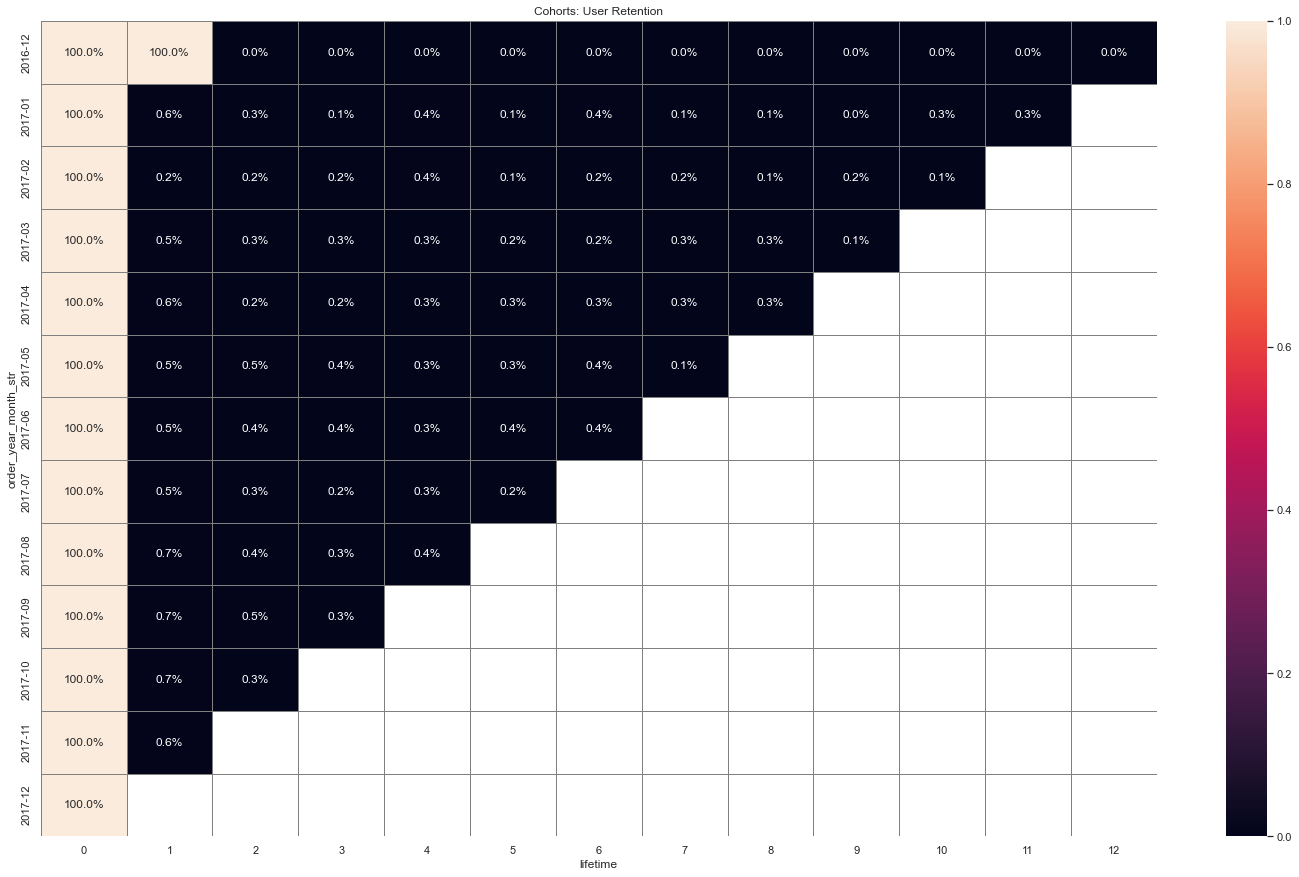

In [223]:
sns.set(style='white')
plt.figure(figsize=(25, 15))
plt.title('Cohorts: User Retention')
sns.heatmap(retention, annot=True, fmt='.1%', linewidths=1, linecolor='gray'); 

In [ ]:
##  Посмотрим максимальные значения retention и выберем значение за 3-й месяц:

In [228]:
print(retention.loc['2017-01':'2017-12', 3].idxmax())

2017-05


In [225]:
## Таким образом, когорта с самым высоким retention на 3й месяц – покупатели, совершившие первую покупку в мае 2017 года

In [229]:
## 6. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию.
     ## В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, 
     ## F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. 
     ## Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, 
     ## frequency и monetary для интерпретации этих кластеров

In [ ]:
## Подготовим данные

In [230]:
task6 = items_and_orders[['order_id', 'order_approved_at', 'product_id', 'price']]

In [231]:
task6

,order_id,order_approved_at,product_id,price
0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:22:12,a9516a079e37a9c9c36b9b78b10169e8,124.99
1,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:58:32,4aa6014eceb682077f9dc4bffebc05b0,289.00
2,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-20 16:19:10,bd07b66896d6f1494f5b86251848ced7,139.94
3,951670f92359f4fe4a63112aa7306eba,2018-03-13 17:29:19,a5647c44af977b148e0a3a4751a09e2e,149.94
4,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 10:10:09,9391a573abe00141c56e38d84d7d5b3b,230.00
...,...,...,...,...
112096,6760e20addcf0121e9d58f2f1ff14298,2018-04-07 16:08:45,ccb4503d9d43d245d3b295d0544f988b,74.90
112097,9ec0c8947d973db4f4e8dcf1fbfa8f1b,2018-04-04 08:35:12,9ede6b0570a75a4b9de4f383329f99ee,114.90
112098,fed4434add09a6f332ea398efd656a5c,2018-04-08 20:30:03,7a5d2e1e131a860ae7d18f6fffa9d689,37.00
112099,e31ec91cea1ecf97797787471f98a8c2,2017-11-03 21:31:20,f819f0c84a64f02d3a5606ca95edd272,689.00


In [235]:
## Получаю датафрейм с суммами по каждому заказу

In [233]:
prices = task6.groupby(['order_id', 'order_approved_at'], as_index=False) \
                .agg({'price': 'sum'})
prices

,order_id,order_approved_at,price
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13 09:45:35,58.90
1,00018f77f2f0320c557190d7a144bdd3,2017-04-26 11:05:13,239.90
2,000229ec398224ef6ca0657da4fc703e,2018-01-14 14:48:30,199.00
3,00024acbcdf0a6daa1e931b038114c75,2018-08-08 10:10:18,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,2017-02-04 14:10:13,199.90
...,...,...,...
98180,fffc94f6ce00a00581880bf54a75a037,2018-04-25 04:11:01,299.99
98181,fffcd46ef2263f404302a634eb57f7eb,2018-07-17 04:31:48,350.00
98182,fffce4705a9662cd70adb13d4a31832d,2017-10-24 17:14:25,99.90
98183,fffe18544ffabc95dfada21779c9644f,2017-08-15 00:04:32,55.99


In [236]:
## Объединяю датафрейм успешных заказов с ценами чтобы получить общий датафрейм

In [234]:
total_df = success_purchases.merge(prices, on=['order_id', 'order_approved_at'])
total_df = total_df.groupby(['order_id', 'customer_unique_id', 'order_approved_at'], as_index=False) \
                    .agg({'price' : 'sum'})
total_df

,order_id,customer_unique_id,order_approved_at,price
0,00010242fe8c5a6d1ba2dd792cb16214,871766c5855e863f6eccc05f988b23cb,2017-09-13 09:45:35,58.90
1,00018f77f2f0320c557190d7a144bdd3,eb28e67c4c0b83846050ddfb8a35d051,2017-04-26 11:05:13,239.90
2,000229ec398224ef6ca0657da4fc703e,3818d81c6709e39d06b2738a8d3a2474,2018-01-14 14:48:30,199.00
3,00024acbcdf0a6daa1e931b038114c75,af861d436cfc08b2c2ddefd0ba074622,2018-08-08 10:10:18,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,64b576fb70d441e8f1b2d7d446e483c5,2017-02-04 14:10:13,199.90
...,...,...,...,...
98180,fffc94f6ce00a00581880bf54a75a037,0c9aeda10a71f369396d0c04dce13a64,2018-04-25 04:11:01,299.99
98181,fffcd46ef2263f404302a634eb57f7eb,0da9fe112eae0c74d3ba1fe16de0988b,2018-07-17 04:31:48,350.00
98182,fffce4705a9662cd70adb13d4a31832d,cd79b407828f02fdbba457111c38e4c4,2017-10-24 17:14:25,99.90
98183,fffe18544ffabc95dfada21779c9644f,eb803377c9315b564bdedad672039306,2017-08-15 00:04:32,55.99


In [238]:
## Период, который охватывают данные

In [239]:
print('Orders from {} to {}'.format(total_df['order_approved_at'].min(),
                                    total_df['order_approved_at'].max()))

Orders from 2016-09-15 12:16:38 to 2018-09-03 17:40:06


In [240]:
## Количество дней в этом периоде

In [241]:
 round((total_df['order_approved_at'].max() - total_df['order_approved_at'].min())/np.timedelta64(1, 'D'))

718

In [242]:
## Расчет Recency, Freqency и Monetary

In [243]:
## Так как данные довольно старые, за точку отсчета возьмем следующий день после даты подтверждения оплаты заказа

In [244]:
NOW = total_df['order_approved_at'].max() + timedelta(days=1)
NOW

Timestamp('2018-09-04 17:40:06')

In [245]:
## Количество прошедших дней ля каждого заказа 

In [246]:
total_df['DaysSinceOrder'] = total_df['order_approved_at'].apply(lambda x: (NOW - x).days)

In [247]:
total_df

,order_id,customer_unique_id,order_approved_at,price,DaysSinceOrder
0,00010242fe8c5a6d1ba2dd792cb16214,871766c5855e863f6eccc05f988b23cb,2017-09-13 09:45:35,58.90,356
1,00018f77f2f0320c557190d7a144bdd3,eb28e67c4c0b83846050ddfb8a35d051,2017-04-26 11:05:13,239.90,496
2,000229ec398224ef6ca0657da4fc703e,3818d81c6709e39d06b2738a8d3a2474,2018-01-14 14:48:30,199.00,233
3,00024acbcdf0a6daa1e931b038114c75,af861d436cfc08b2c2ddefd0ba074622,2018-08-08 10:10:18,12.99,27
4,00042b26cf59d7ce69dfabb4e55b4fd9,64b576fb70d441e8f1b2d7d446e483c5,2017-02-04 14:10:13,199.90,577
...,...,...,...,...,...
98180,fffc94f6ce00a00581880bf54a75a037,0c9aeda10a71f369396d0c04dce13a64,2018-04-25 04:11:01,299.99,132
98181,fffcd46ef2263f404302a634eb57f7eb,0da9fe112eae0c74d3ba1fe16de0988b,2018-07-17 04:31:48,350.00,49
98182,fffce4705a9662cd70adb13d4a31832d,cd79b407828f02fdbba457111c38e4c4,2017-10-24 17:14:25,99.90,315
98183,fffe18544ffabc95dfada21779c9644f,eb803377c9315b564bdedad672039306,2017-08-15 00:04:32,55.99,385


In [249]:
## Теперь сделаем датафрейм, где на каждого уникального покупателя будет приходиться одна строка

In [251]:
## Расчет Recency и Frequency

In [252]:
aggr = {
    'DaysSinceOrder': lambda x: x.min(),  # the number of days since last order (Recency)
    'order_approved_at': lambda x: len(x), # the total number of orders in the last period (Frequency)
}
rfm = total_df.groupby('customer_unique_id').agg(aggr).reset_index()
rfm.rename(columns={'DaysSinceOrder': 'Recency', 'order_approved_at': 'Frequency'}, inplace=True)
rfm

,customer_unique_id,Recency,Frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1
2,0000f46a3911fa3c0805444483337064,542,1
3,0000f6ccb0745a6a4b88665a16c9f078,326,1
4,0004aac84e0df4da2b147fca70cf8255,293,1
...,...,...,...
94965,fffcf5a5ff07b0908bd4e2dbc735a684,452,1
94966,fffea47cd6d3cc0a88bd621562a9d061,267,1
94967,ffff371b4d645b6ecea244b27531430a,574,1
94968,ffff5962728ec6157033ef9805bacc48,125,1


In [255]:
## Расчет Monetary

In [256]:
Monetary = total_df.groupby('customer_unique_id', as_index=False) \
                    .agg({'price' : 'sum'}) \
                    .rename(columns={'price' : 'Monetary'})

In [257]:
Monetary

,customer_unique_id,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90
2,0000f46a3911fa3c0805444483337064,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,25.99
4,0004aac84e0df4da2b147fca70cf8255,180.00
...,...,...
94965,fffcf5a5ff07b0908bd4e2dbc735a684,1570.00
94966,fffea47cd6d3cc0a88bd621562a9d061,64.89
94967,ffff371b4d645b6ecea244b27531430a,89.90
94968,ffff5962728ec6157033ef9805bacc48,115.00


In [258]:
rfm = rfm.merge(Monetary, on='customer_unique_id')
rfm.head()

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90
2,0000f46a3911fa3c0805444483337064,542,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00


In [259]:
## Определим кластеры для метрик R, F и M и выделим границы каждой метрики 
## Для прикидки посмотрим на квантили распределения данных

In [260]:
quintiles = rfm[['Recency', 'Frequency', 'Monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'Recency': {0.2: 98.0, 0.4: 182.0, 0.6: 273.0, 0.8: 388.0},
 'Frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0},
 'Monetary': {0.2: 39.9, 0.4: 69.9, 0.6: 109.9, 0.8: 179.9}}

In [261]:
## Делить все метрики просто по квантилям очевидно нецелесообразно, поэтому посмотрим на каждую метрику по отдельности

In [262]:
rfm.Recency.describe()

count    94970.000000
mean       243.475519
std        152.952043
min          1.000000
25%        119.000000
50%        224.000000
75%        352.000000
max        719.000000
Name: Recency, dtype: float64

<AxesSubplot:xlabel='Recency', ylabel='Count'>

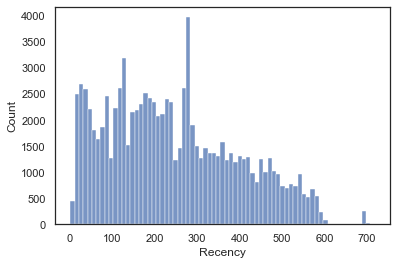

In [263]:
 sns.histplot(rfm, x='Recency')

In [264]:
rfm.Recency.quantile(q=[0.3, 0.7])

0.3    140.0
0.7    318.0
Name: Recency, dtype: float64

In [265]:
## Период метрики Recency составляет 713 дней, это почти два года. 
## Первая мысль - разделить кластеры по полугодиям, но вид распределения заставляет отбросить эту идею.
## В целом возможно деление с опорой на рассчитанные ранее квантили, здесь они будут вполне уместны.

In [266]:
rfm.Frequency.describe()

count    94970.000000
mean         1.033853
std          0.210801
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         16.000000
Name: Frequency, dtype: float64

In [267]:
rfm.Frequency.value_counts()

1     92084
2      2650
3       188
4        29
5         9
6         5
7         3
9         1
16        1
Name: Frequency, dtype: int64

<AxesSubplot:xlabel='Frequency', ylabel='Count'>

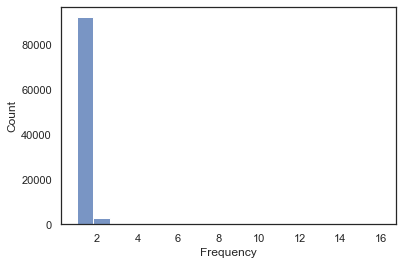

In [268]:
 sns.histplot(rfm, x='Frequency')

In [269]:
## С Frequency ничего удивительного, учитывая, что еще в первом пункте мы выяснили, 
##  что большинство покупателей совершили всего одну покупку. 
##  Напрашивается деление на тех, у кого 1 покупка (большинство), 2 (значительно меньше, но такие тоже есть), 
##   3-4 (немного, но все же больше 200 человек), и больше 4 покупок (таких единицы)

In [270]:
 rfm.Monetary.describe()

count    94970.000000
mean       142.073605
std        216.085833
min          0.850000
25%         47.900000
50%         89.890000
75%        155.000000
max      13440.000000
Name: Monetary, dtype: float64

<AxesSubplot:xlabel='Monetary', ylabel='Count'>

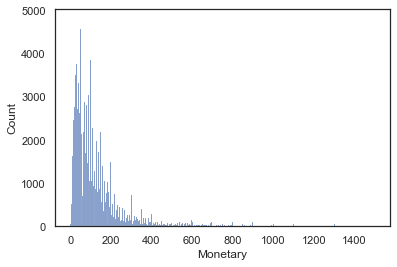

In [271]:
sns.histplot(rfm[rfm.Monetary < 1500], x='Monetary')

<AxesSubplot:xlabel='Monetary', ylabel='Count'>

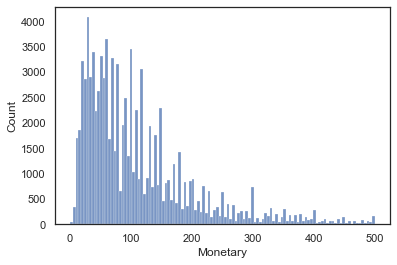

In [272]:
 sns.histplot(rfm[rfm.Monetary < 500], x='Monetary')

In [273]:
rfm.Monetary.quantile(q=0.9)

281.24900000000287

In [274]:
## Основная часть значений (порядка 90%) Monetary лежит в пределах до приблизительно 300. 
## Значения выше этого числа можно выделить в один кластер, так как их на порядок меньше. 
## Остальные кластеры выделяются на основании процентилей: половина значений лежит в пределах до 90, 
## промежуток между 90 и 300 для наглядности тоже стоит разделить на две части (неравные): от 90 до 155, 
## так как 75% значений не превышают 155, и от 155 до 300

In [275]:
## Таким образом, деление будет следующее: \
## Recency: 1 - больше 350 дней, 2 - 220-350 дней, 3 - 115-220 дней, 4 - меньше 115 дней \
## Frequency: 1 - 1 покупка, 2 - 2 покупки, 3 - 3-4 покупки, 4 - больше 4 покупок \
## Monetary: 1 - до 90, 2 - от 90 до 155, 3 - от 155 до 300, 4 - больше 300

In [276]:
## Построим границы каждой метрики для интерпретации кластеров

In [277]:
def r_score(x):
    if x <= 115:
        return 4
    elif x <= 220:
        return 3
    elif x <= 350:
        return 2
    else:
        return 1

In [278]:
def f_score(x):
    if x > 4:
        return 4
    elif x > 2:
        return 3
    elif x > 1:
        return 2
    else:
        return 1     

In [279]:
def m_score(x):
    if x >= 300:
        return 4
    elif x >= 155:
        return 3
    elif x >= 90:
        return 2
    else:
        return 1      

In [280]:
rfm['R'] = rfm['Recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['Frequency'].apply(lambda x: f_score(x))
rfm['M'] = rfm['Monetary'].apply(lambda x: m_score(x))

In [281]:
## Объединим метрики R, F и M для построения RFM-сегментов

In [282]:
rfm['RFM Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm.head()

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM Score
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1,129.90,3,1,2,312
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,3,1,1,311
2,0000f46a3911fa3c0805444483337064,542,1,69.00,1,1,1,111
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00,2,1,3,213


In [284]:
## Визуализируем RFM-сегментацию пользователей

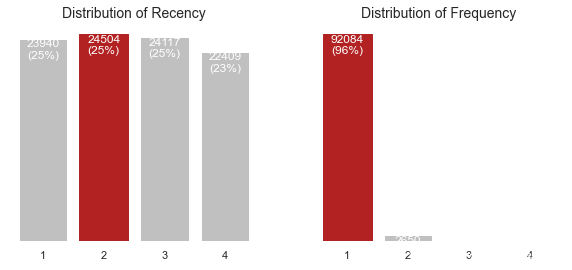

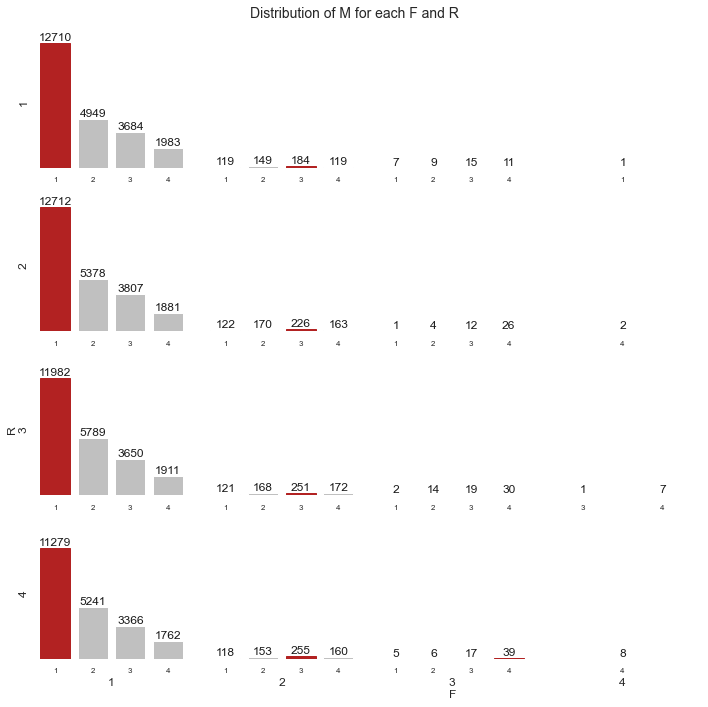

In [285]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))


for i, p in enumerate(['R', 'F']):
    parameters = {'R':'Recency', 'F':'Frequency'}
    y = rfm[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color='silver')
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Distribution of {}'.format(parameters[p]),
                fontsize=14)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('firebrick')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 5,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
               ha='center',
               va='top',
               color='w')

plt.show()

# plot the distribution of M for RF score
fig, axes = plt.subplots(nrows=4, ncols=4,
                         sharex=False, sharey=True,
                         figsize=(10, 10))

r_range = range(1, 5)
f_range = range(1, 5)
for r in r_range:
    for f in f_range:
        y = rfm[(rfm['R'] == r) & (rfm['F'] == f)]['M'].value_counts().sort_index()
        x = y.index
        ax = axes[r - 1, f - 1]
        bars = ax.bar(x, y, color='silver')
        if r == 4:
            if f == 3:
                ax.set_xlabel('{}\nF'.format(f), va='top')
            else:
                ax.set_xlabel('{}\n'.format(f), va='top')
        if f == 1:
            if r == 3:
                ax.set_ylabel('R\n{}'.format(r))
            else:
                ax.set_ylabel(r)
        ax.set_frame_on(False)
        ax.tick_params(left=False, labelleft=False, bottom=False)
        ax.set_xticks(x)
        ax.set_xticklabels(x, fontsize=8)

        for bar in bars:
            value = bar.get_height()
            if value == y.max():
                bar.set_color('firebrick')
            ax.text(bar.get_x() + bar.get_width() / 2,
                    value,
                    int(value),
                    ha='center',
                    va='bottom',
                    color='k')
fig.suptitle('Distribution of M for each F and R',
             fontsize=14)
plt.tight_layout()
plt.show()

In [286]:
## Определим сегменты пользователей, основываясь на метриках R и F

In [287]:
pd.set_option('display.max_colwidth', None)

description = pd.DataFrame({'Segment' : ['liders', 'loyal', 'potential loyalists', 
                                         'need attention', 'need to keep', 'need to return', 'hibernating', 'new'],
                           'Description' : ['Покупали недавно и много',
                                           'Покупают много, но не так часто',
                                           'Покупали недавно и могут покупать чаще',
                                           'Требуют внимания, совершили 1 покупку, но не очень давно',
                                           'Нужно удержать, покупали много, но давно не было покупок',
                                           'Нужно вернуть, покупали много, но очень давно',
                                           'Неактивные, покупали мало и очень давно',
                                           'Новые, недавно совершили 1 покупку']})
description

,Segment,Description
0,liders,Покупали недавно и много
1,loyal,"Покупают много, но не так часто"
2,potential loyalists,Покупали недавно и могут покупать чаще
3,need attention,"Требуют внимания, совершили 1 покупку, но не очень давно"
4,need to keep,"Нужно удержать, покупали много, но давно не было покупок"
5,need to return,"Нужно вернуть, покупали много, но очень давно"
6,hibernating,"Неактивные, покупали мало и очень давно"
7,new,"Новые, недавно совершили 1 покупку"


In [288]:
segt_map = {
    r'[1-2][1-2]': 'hibernating',
    r'1[3-4]': 'need to return',  
    r'2[3-4]': 'need to keep',
    r'3[3-4]': 'loyal',
    r'31': 'need attention',
    r'41': 'new',
    r'[3-4]2': 'potential loyalists',
    r'4[3-4]': 'liders'
}

rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)
rfm.head()

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM Score,Segment
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1,129.90,3,1,2,312,need attention
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,3,1,1,311,need attention
2,0000f46a3911fa3c0805444483337064,542,1,69.00,1,1,1,111,hibernating
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,2,1,1,211,hibernating
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00,2,1,3,213,hibernating


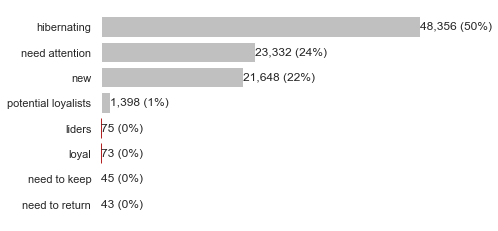

In [289]:
segments_counts = rfm['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['liders', 'loyal']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

In [290]:
## Большинство пользователей неактивные, но довольно значительное количество попало в группы новых и требующих внимания. 
## Лояльных пользователей совсем немного. 
## В целом по результатам всех исследований можно предположить, что магазин продает товары, которые редко покупаются 
## несколько раз в силу какой-то своей специфики, поскольку возвращаемость клиентов и их лояльность находятся 
## в околонулевых значениях